# Exercise on MLP configuration

### António Rebelo (55761) & Marco Mercier (55877)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# set random seed for reproducible results
np.random.seed(0)

We will be using 2 different NN models to solve the XOR problem under different circumstances:

* **model_1**: MLP with 2 inputs, 2 hidden neurons and 1 output neuron with complete forward connections
* **model_2**: MLP with 2 inputs, 1 hidden neuron, 1 output neuron and shortcut connections

It was decided to build both NN using the same library in order to really compare them.

Lets build these models:

In [1]:
# building model_1
def model_1(activation='sigmoid', momentum=0.0, eta=0.3):
    inputs = keras.Input(shape=(2,)) # two inputs
    h_layer = layers.Dense(1, activation=activation)(inputs) # two neurons in the hidden layer
    out_layer = layers.Dense(1, activation=activation)(h_layer) # one output

    # create the model
    model = keras.Model(inputs=inputs, outputs=out_layer)

    # configure and return the model for training using SGD with input momentum
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=eta,  momentum=momentum), metrics=['accuracy'])
    return model

In [3]:
# building model_2
def model_2(activation='sigmoid', momentum=0.0, eta=0.3):
    inputs = keras.Input(shape=(2,)) # two inputs
    h_layer = layers.Dense(1, activation=activation)(inputs) # one neuron in the hidden layer
    concat = layers.concatenate([inputs, h_layer]) # get the shortcut connection of the inputs and the output of the hidden layer
    out_layer = layers.Dense(1, activation=activation)(concat) # one output

    # create the model
    model = keras.Model(inputs=inputs, outputs=out_layer)

    # configure and return the model for training using SGD with input momentum
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=eta,  momentum=momentum), metrics=['accuracy'])
    return model

In [4]:
def n_fit(x, y, model, runs=5, epochs=5000):
    ''' function to fit the model for the defined number of runs and return the average and std deviation of loss and accuracy
    '''
    loss = []
    acc = []
    for _ in range(runs):
        hist = model.fit(x,y, epochs=epochs, batch_size=1, verbose=0) # fit the model
        loss.append(hist.history['loss'][-1]) # append the last epoch's loss
        acc.append(hist.history['accuracy'][-1]) # append the last epoch's accuracy
        
    
    means = [np.mean(acc) , np.mean(loss)]
    errors = [np.std(acc) , np.std(loss) ]
    

    return means, errors

In [5]:
def compare_models(x, y, activation, momentum, eta, runs=5, epochs=5000):
    '''function to compare two models under different circumstances and plot the results
    '''
    models = [model_1(activation=activation, momentum=momentum, eta=eta), model_2(activation=activation, momentum=momentum, eta=eta)]
    names = ['model 1', 'model 2']

    fig, axes = plt.subplots(1, 2, figsize=(20,5))

    for model, name, ax in zip(models, names, axes):
        means , errors = n_fit(x, y, model, runs=runs, epochs=epochs)
        
        x_pos = range(2)
        ax.bar(x_pos, means, yerr=errors, align='center', width=0.5, alpha=0.4, ecolor='black', capsize=10)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(["Accuracy","Loss"])
        ax.set_title(name)

## A) Hidden neurons with logistic activation function
* Data set with binary values in {0, 1}
* Standard backpropagation algorithm

In [6]:
# inputs x and labels y
x_0 = np.array([[0,0],[0,1],[1,0],[1,1]])
y_0 = np.array([[0],[1],[1],[0]])

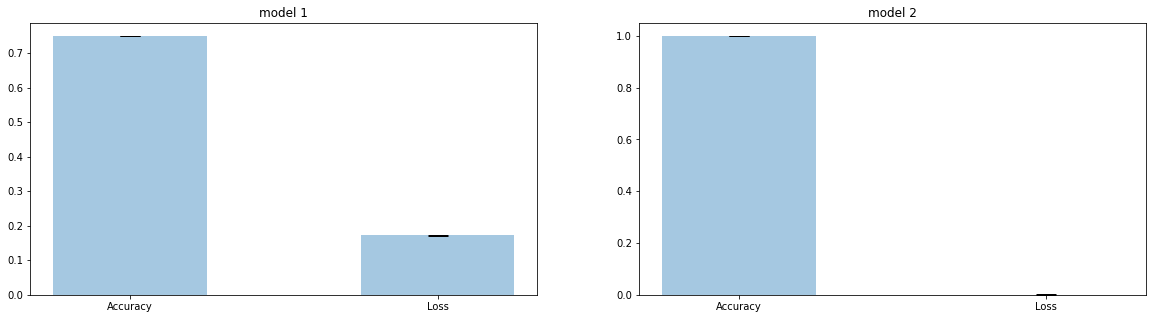

In [7]:
activation = 'sigmoid'
eta = 0.3
momentum = 0
runs = 5
epochs = 5000

# compare both models under these circumstances
compare_models(x_0, y_0,activation=activation, momentum=momentum, eta=eta, runs=runs, epochs=epochs)

**Take-aways:**
* model 2 outperformed model 1 having a mean accuracy of 100% compared to ~75% of model 1
* model 1 has a 20% of mean mean squeared error while model 2 has 0 or near zero

## B) Hidden neurons with hyperbolic tangent activation function
* Data set with binary values in {-1, 1}
* Backpropagation with momentum algorithm

In [8]:
# inputs x and labels y
x_1 = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y_1 = np.array([[-1],[1],[1],[-1]])

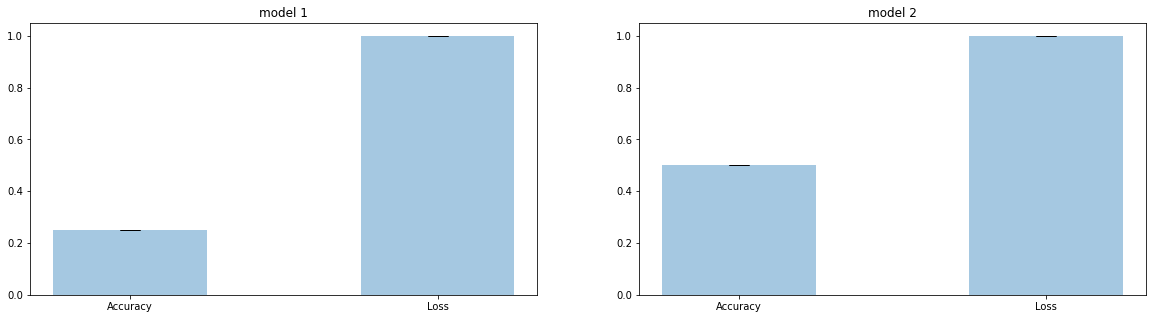

In [9]:
activation = 'tanh'
eta = 0.3
momentum = 0.9
runs = 5
epochs = 5000

# compare both models under these circumstances
compare_models(x_1, y_1, activation=activation, momentum=momentum, eta=eta, runs=runs, epochs=epochs)


**Take-aways:**
* Both models performed poorly 
* model 2 outperformed model 1 again
* model 1 was not able to solve the XOR proble at all under these configuration, presenting the highest value of mean mean squared error possible which means it doesn't converge.
* model 2 presents an error of 1 and a mean accuracy of 0.5, which means the model is not better than a coin flip

## C) Hidden neurons with relu activation function
* Data set with binary values in {0, 1}
* Standard backpropagation algorithm

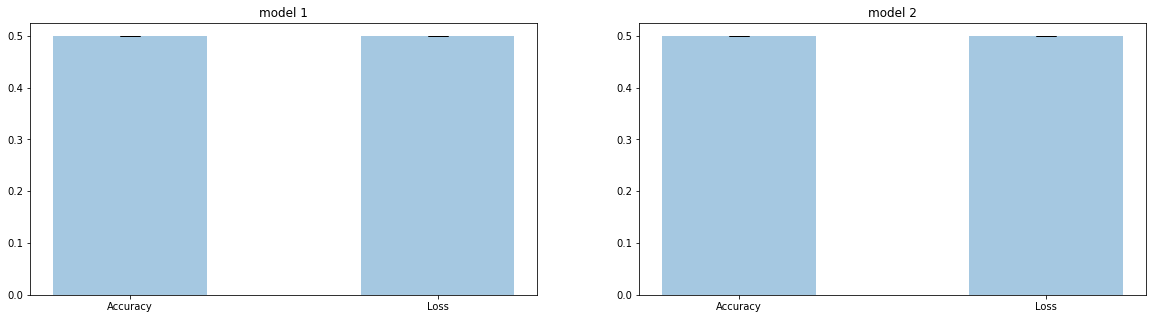

In [10]:
activation = 'relu'
eta = 0.3
momentum = 0
runs = 5
epochs = 5000

# compare both models under these circumstances
compare_models(x_0, y_0,activation=activation, momentum=momentum, eta=eta, runs=runs, epochs=epochs)

**Take-aways:**
* both models performed as good as a coin toss

## D) Hidden neurons with relu activation function and momentum
* Data set with binary values in {0, 1}
* Backpropagation with momentum algorithm

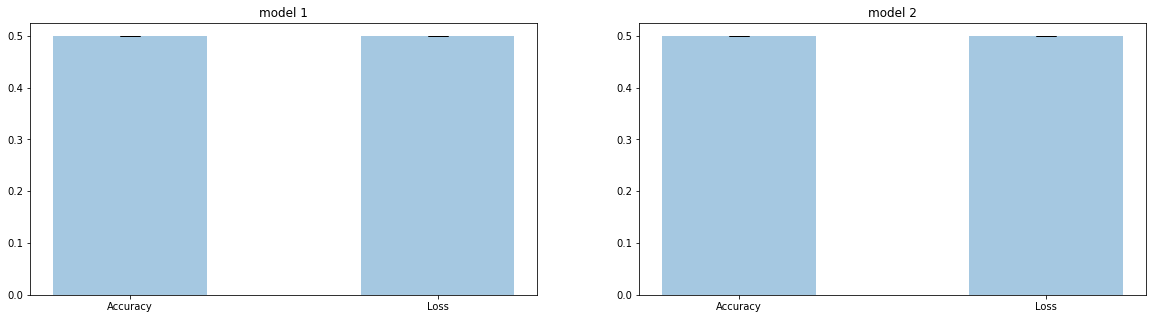

In [11]:
activation = 'relu'
eta = 0.3
momentum = 0.9
runs = 5
epochs = 5000

# compare both models under these circumstances
compare_models(x_0, y_0,activation=activation, momentum=momentum, eta=eta, runs=runs, epochs=epochs)

**Take-aways:**
* with momentum as 0.9 and relu activation function both models performed the same
* both models have 50% of acurracy and 0.5 of mean of the loss function, so they are not better than a coin toss

## Conclusions

* The way a NN is built, how it is trained, which activation function ( or functions) is used and other parameters such as momentum affect the NN performance
* Hyperparametrization of the neural network, after designing it, is a crucial step for getting good results out of it
* For the XOR problem, the best performing model was **model 2 under circumstances A)**.